<a href="https://colab.research.google.com/github/IsaiyarasanD/top-100-movies/blob/main/IMDB_top_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df=pd.read_csv('/content/movies.csv')

In [ ]:
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            99 non-null     float64
 1   movie_name       99 non-null     object 
 2   year_of_release  99 non-null     object 
 3   category         99 non-null     object 
 4   run_time         99 non-null     object 
 5   genre            99 non-null     object 
 6   imdb_rating      99 non-null     float64
 7   votes            99 non-null     object 
 8   gross_total      98 non-null     object 
dtypes: float64(2), object(7)
memory usage: 7.1+ KB


In [ ]:
df.describe()

,index,imdb_rating
count,99.000000,99.000000
mean,50.000000,8.348485
std,28.722813,0.368772
min,1.000000,7.200000
25%,25.500000,8.100000
50%,50.000000,8.300000
75%,74.500000,8.600000
max,99.000000,9.300000


In [ ]:
df.isna().sum()

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

EDA analysis

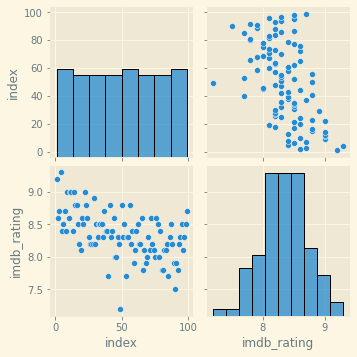

In [ ]:
sns.pairplot(df)

The most common categories

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f374464c760>],
      dtype=object)

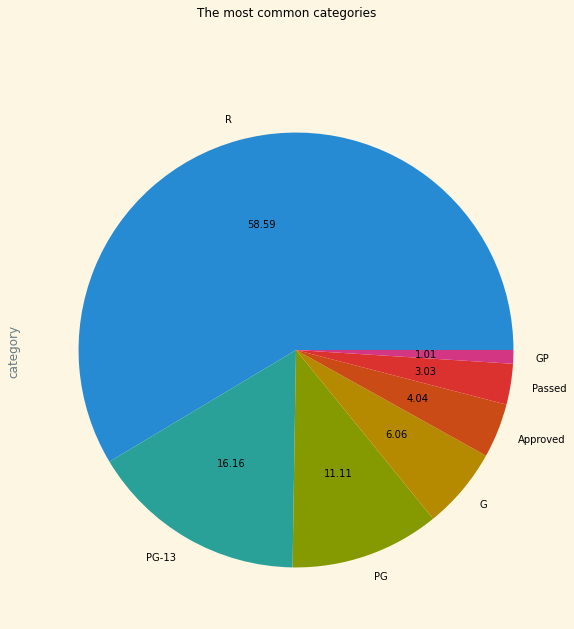

In [ ]:
df['category'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='The most common categories')

In [ ]:
df['gross_total'] = df['gross_total'].astype(str).str.lstrip('$').str.rstrip('M')


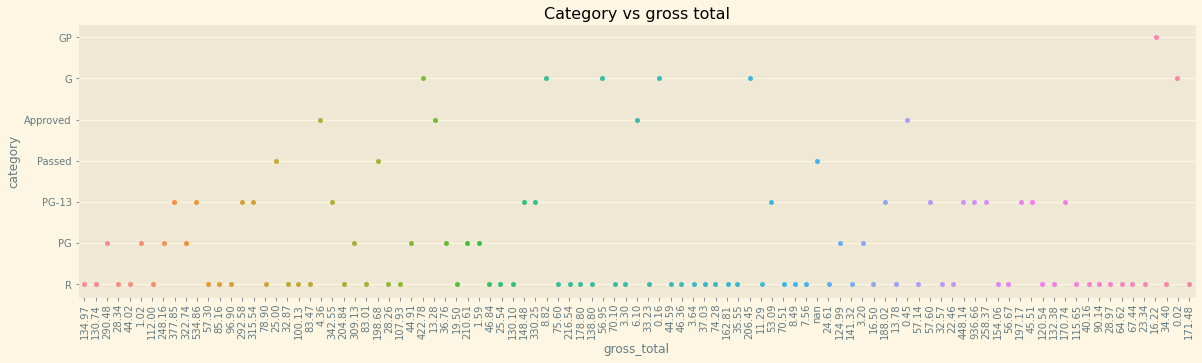

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.stripplot(y="category", x="gross_total", data=df).set(title='Сategory vs gross total')

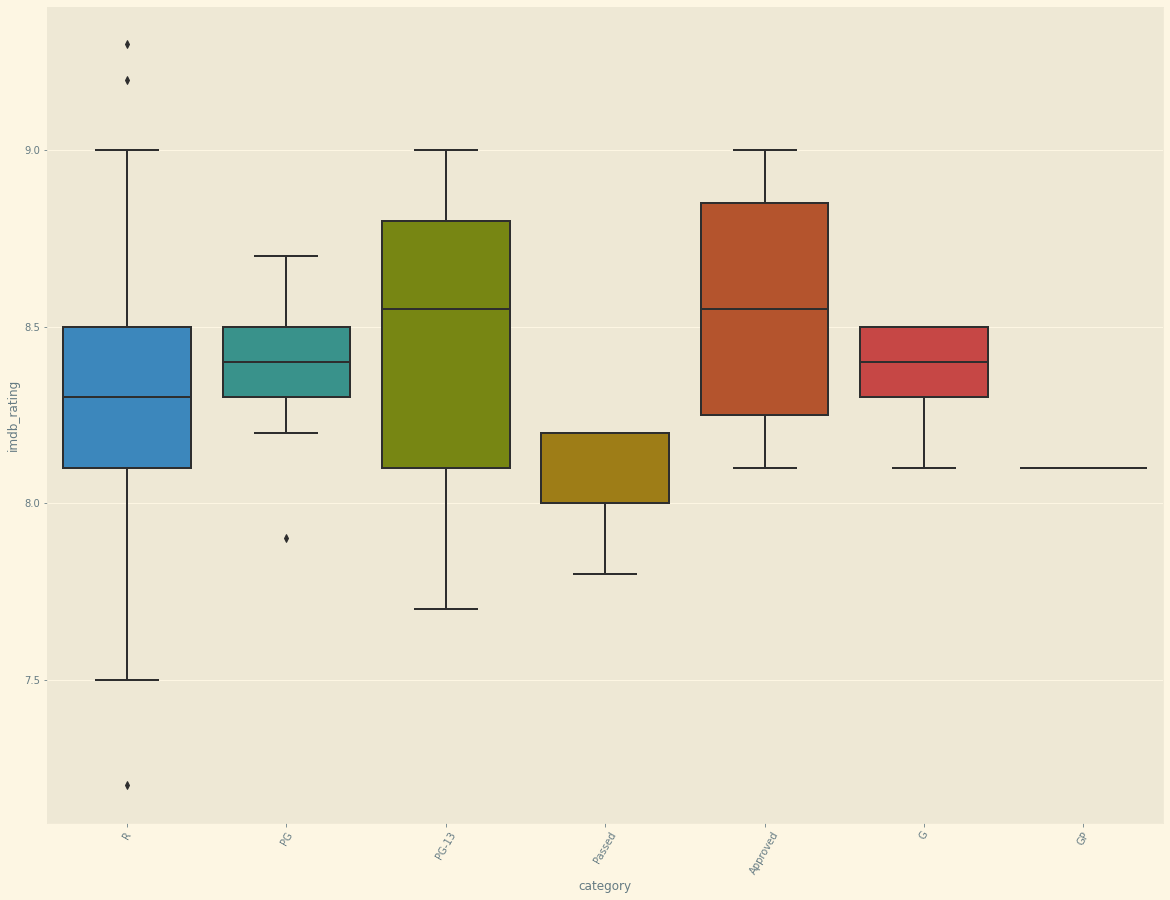

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=60)
ax = sns.boxplot(x="category", y="imdb_rating", data=df)

The most common genres

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37422a84f0>],
      dtype=object)

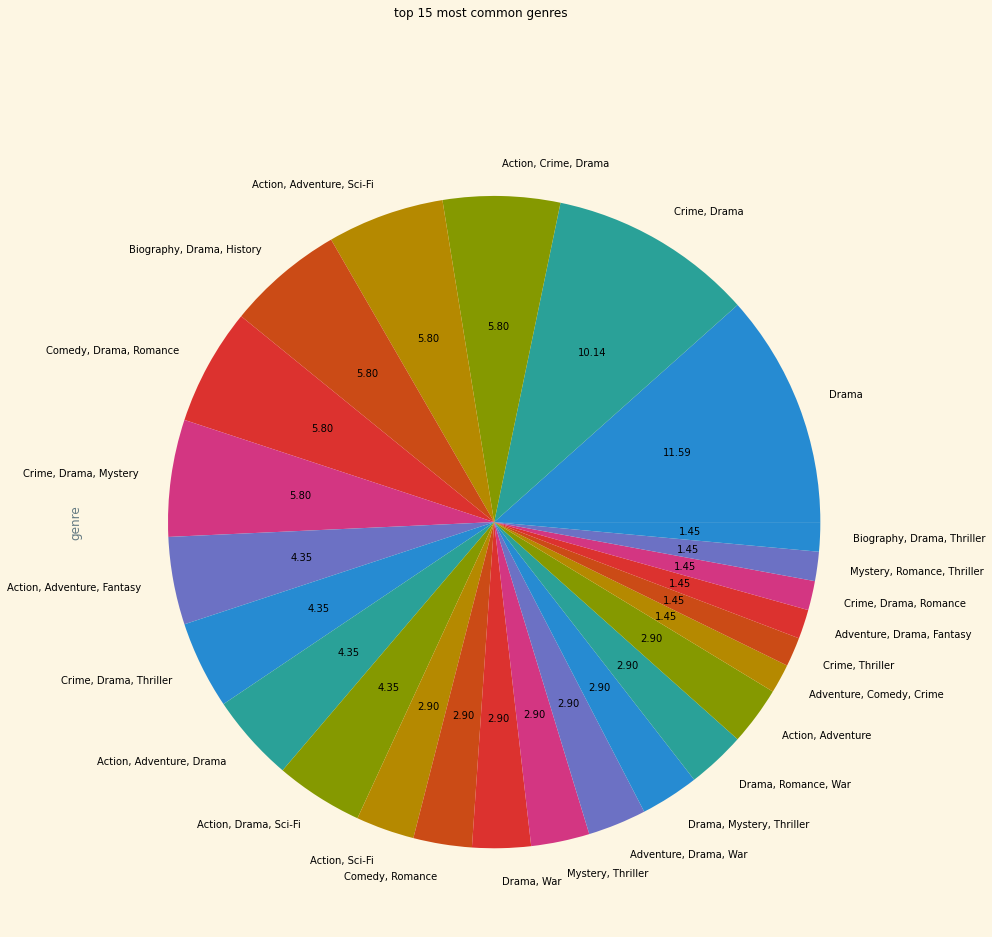

In [ ]:
df['genre'].value_counts().head(25).plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(15,15), title='top 15 most common genres')

Movies vs rating

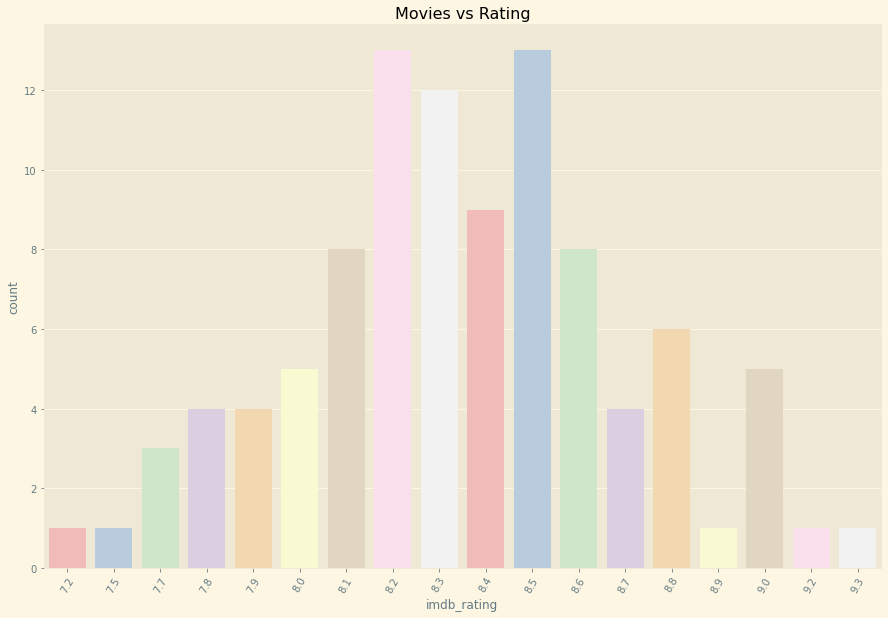

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.countplot(data=df,x="imdb_rating",palette="Pastel1").set(title='Movies vs Rating')
plt.show()

Rating vs gross total

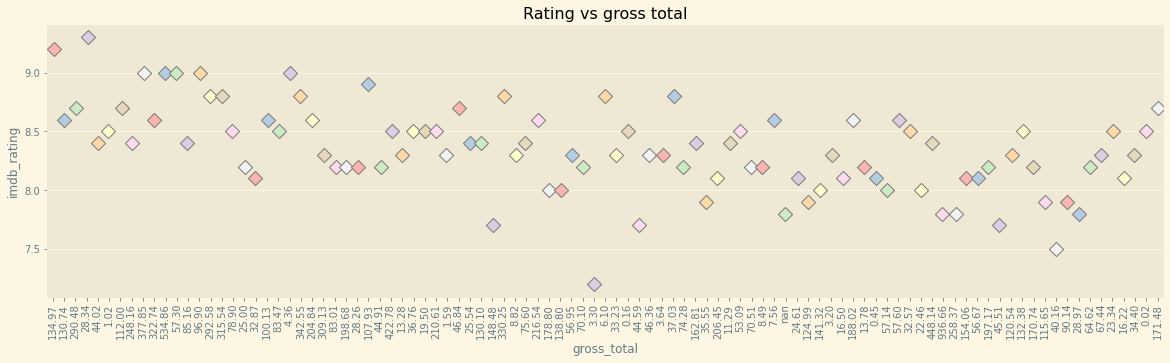

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.stripplot(y="imdb_rating", x="gross_total", data=df, palette="Pastel1", s=10, marker="D", linewidth=1, alpha=1).set(title='Rating vs gross total')sns.displot(df, x='imdb_rating',bins=20, hue='category',aspect=1.9).set(title='Rating vs category')
plt.show()

Rating vs category

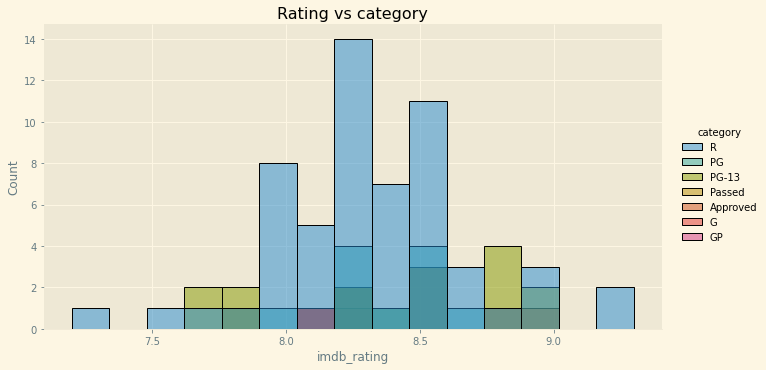

In [ ]:
sns.displot(df, x='imdb_rating',bins=15, hue='category',aspect=1.9).set(title='Rating vs category')
plt.show()

In [ ]:
df['year_of_release']=df['year_of_release'].str.replace('\(|\)','')

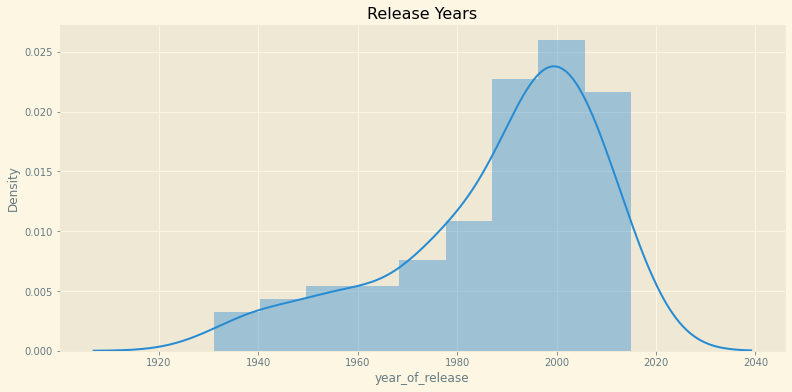

In [ ]:
plt.figure(figsize=(13,6))
sns.distplot(df["year_of_release"])
plt.title("Release Years")
plt.show()

In [ ]:
df['run_time'] = df['run_time'].apply(lambda x: float(x.split()[0].replace('min', '')))

Runtime in minutes

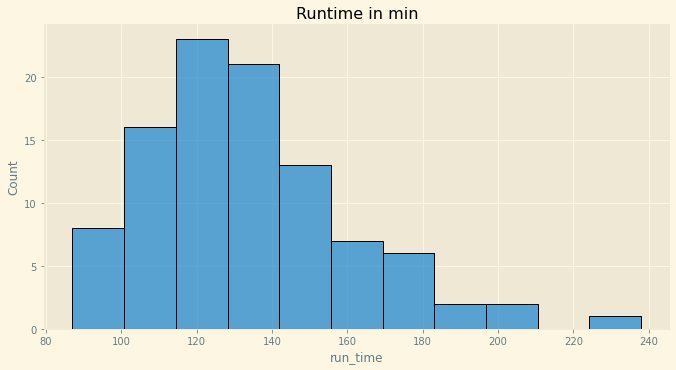

In [ ]:
sns.displot(df, x= 'run_time', aspect=1.9)
plt.title("Runtime in min")
plt.show()

Runtime vs vote average

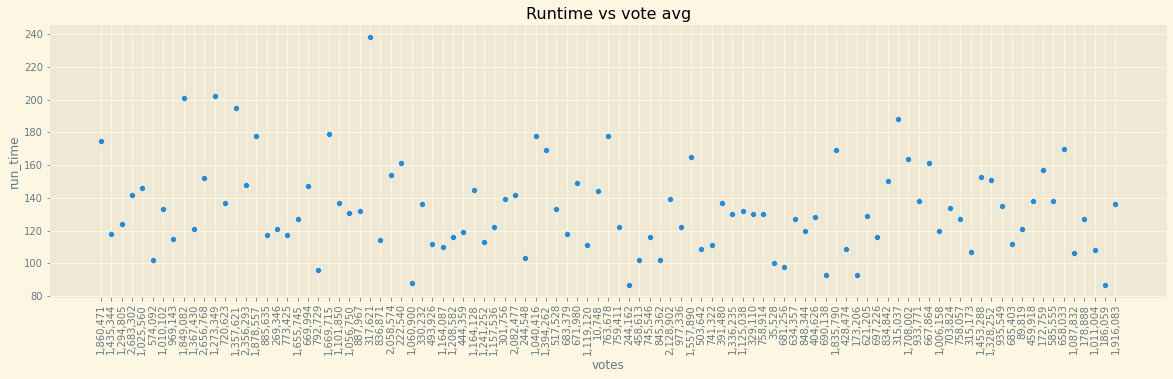

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['votes'], y=df["run_time"])
plt.title("Runtime vs vote avg")
plt.xticks(rotation=90)
plt.show()

Average indicators "run_time", "imdb_rating" for all genres of films, sorted by rating

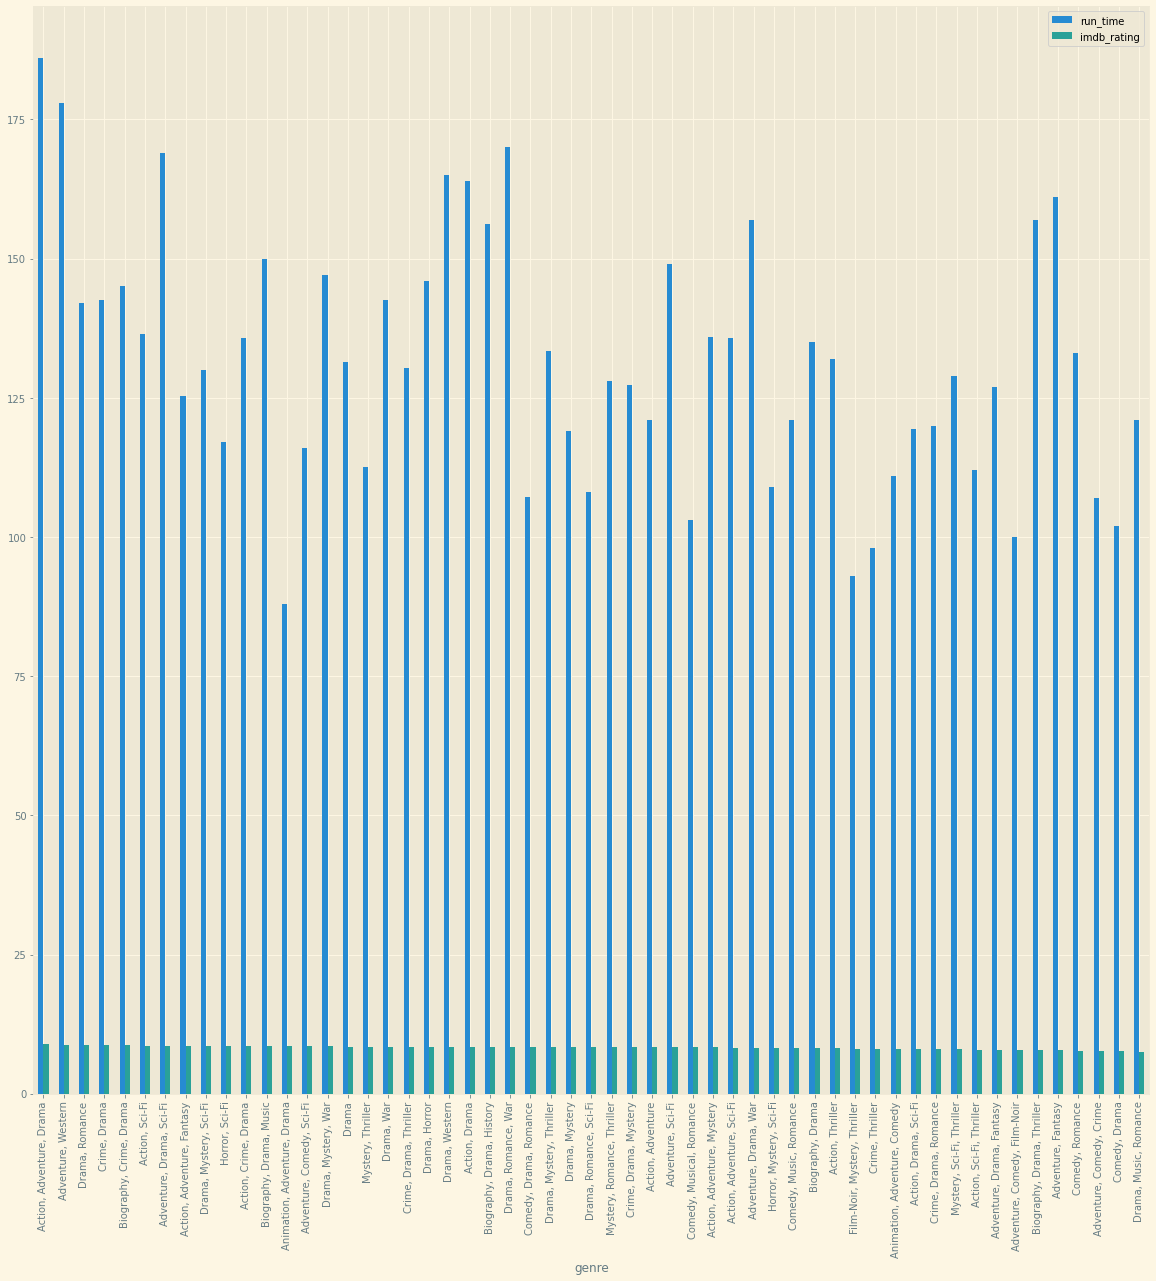

In [ ]:
df.groupby('genre')['run_time', 'imdb_rating'].agg('mean').sort_values(by='imdb_rating', ascending=False).plot(kind='bar',figsize=(20,20))

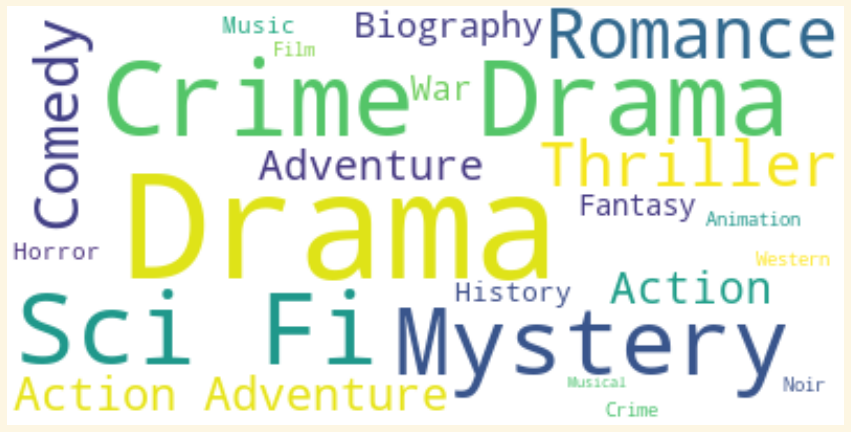

In [ ]:
stopwords = set(STOPWORDS)
text = " ".join(df['genre'])

plt.figure( figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords, max_words=100, max_font_size=70, random_state=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()